In [15]:
from typing import TypedDict, List
from langgraph.graph import StateGraph

In [2]:
class AgentState(TypedDict):
  name: str
  age: str
  final: str



In [10]:
def first_node(state: AgentState) -> AgentState:
  """This function handles the first node of the graph."""
  state['final'] = f"Hello {state['name']}!"
  return state

def second_node(state: AgentState) -> AgentState:
  """This function handles the second node of the graph."""
  state['final'] += f" You are {state['age']} years old!"
  return state

In [11]:
graph = StateGraph(AgentState)
graph.add_node("first_node", first_node)
graph.add_node("second_node", second_node)
graph.set_entry_point("first_node")
graph.add_edge("first_node", "second_node")
graph.set_finish_point("second_node")
app = graph.compile()


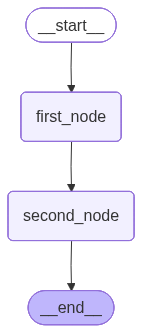

In [12]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [13]:
result = app.invoke({"name": "John", "age": "20"})
print(result)

{'name': 'John', 'age': '20', 'final': 'Hello John! You are 20 years old!'}


In [31]:
class AgentState(TypedDict):
  name: str
  age: int
  skills: List[str]
  final: str

def first_node(state: AgentState) -> AgentState:
  """This function handles the first node of the graph."""
  state['final'] = f"{state['name']}, welcome to the system!"
  return state

def second_node(state: AgentState) -> AgentState:
  """This function handles the second node of the graph."""
  state['final'] += f" You are {state['age']} years old."
  return state

def third_node(state: AgentState) -> AgentState:
  """This function handles the third node of the graph."""
  state['final'] += f" You have skills in:{', '.join(state['skills'])}"
  return state


In [32]:
graph2 = StateGraph(AgentState)
graph2.add_node("first_node", first_node)
graph2.add_node("second_node", second_node)
graph2.add_node("third_node", third_node)
graph2.set_entry_point("first_node")
graph2.add_edge("first_node", "second_node")
graph2.add_edge("second_node", "third_node")
graph2.set_finish_point("third_node")
app2 = graph2.compile()


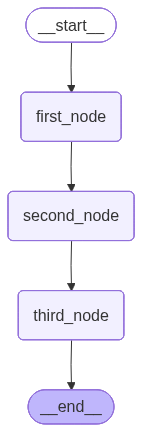

In [33]:
display(Image(app2.get_graph().draw_mermaid_png()))

In [34]:
results = app2.invoke({"name": "John", "age": 20, "skills": ["Python", "SQL"]})
print(results)

{'name': 'John', 'age': 20, 'skills': ['Python', 'SQL'], 'final': 'John, welcome to the system! You are 20 years old. You have skills in:Python, SQL'}


In [35]:
print(results['final'])

John, welcome to the system! You are 20 years old. You have skills in:Python, SQL
